In [1]:
pip install arabic-reshaper

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install python-bidi

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.


In [4]:
import csv
import pandas as pd
dataFrame = pd.read_csv('Training Data after method2.csv')
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import squarify 

In [5]:
#remove Neutral 
dataFrame= dataFrame[dataFrame['sentiment'] != 'Neutral']
dataFrame.head(5)

,tweets,len,ID,Date,Source,Likes,RTs,location,UserName,Name,clean tweets,clean tweet length\r,pos_count,neg_count,sentiment
0,@noon حلو,9,1237056817714401280,2020-03-09 16:45:03,Twitter for Android,0,0,Saudi Arabia,almrkazameen991,Ameen althrhain,حلو,4,1,0,Positive
12,@noon @SaudiMCI شوف الاستغلال يا وزارة التجاره,47,1237022420453728256,2020-03-09 14:28:22,Twitter for iPhone,0,0,None,fuadzamareeh,Fuad,شوف الاستغلال يا وزاره التجاره,31,0,1,Negative
26,@noon اسوء شركة تطلب طلب يلغون الطلب,36,1236975261616406529,2020-03-09 11:20:58,Twitter for iPhone,0,0,None,nq6vb,nq6v,اسوء شركه تطلب طلب يلغون الطلب,31,0,1,Negative
28,@noon انا شريت من الموقع حامل للجوال بقيمة 18 ...,106,1236967211761369088,2020-03-09 10:48:59,Twitter for Android,0,0,Saudi Arabia,norah_sh07_,نورة العساف,انا شريت من الموقع حامل لجوال بقيمه 18 ريال و...,97,0,1,Negative
30,@noon الغاء طلب في نون NSAC30037599804,38,1236960978417393664,2020-03-09 10:24:13,Twitter for iPhone,0,0,None,Nono42970253,Nono,الغاء طلب في نون NSAC303759804,31,0,2,Negative


In [6]:
from collections import Counter 

from nltk.tokenize import RegexpTokenizer
meaningless=['شكرا','مرحبا','هو','انا','علي','عن','من','الرابط','لك','كل','و','في','ما','هذا','او','بك','قد']
meaningful=[]
h=0

tokenizer = RegexpTokenizer(r'\w+')
dataFrame["tokens"] = dataFrame["clean tweets"].apply(tokenizer.tokenize)
all_words = [word for tokens in dataFrame["tokens"] for word in tokens]
for i in all_words:
    if not i in meaningless:
        meaningful.append(i)

meaningful

['حلو',
 'شوف',
 'الاستغلال',
 'يا',
 'وزاره',
 'التجاره',
 'اسوء',
 'شركه',
 'تطلب',
 'طلب',
 'يلغون',
 'الطلب',
 'شريت',
 'الموقع',
 'حامل',
 'لجوال',
 'بقيمه',
 '18',
 'ريال',
 'ولما',
 'جاني',
 'الطلب',
 'طلب',
 'مني',
 'المندوب',
 'ادفع',
 '47',
 'ليه',
 'هالمبلغ',
 'الغاء',
 'طلب',
 'نون',
 'NSAC303759804',
 'المشكله',
 'الي',
 'تملي',
 'عينو',
 'تم',
 'الغاء',
 'طلبيه',
 'قبل',
 'منصه',
 'نون',
 'لزياده',
 'سعر',
 'معقم',
 'اليدين',
 'طلبته',
 'وكان',
 'سعره',
 'خمسه',
 'عشر',
 'ريالا',
 'والغوا',
 'الطلب',
 'والان',
 'زادو',
 'صدق',
 'انكم',
 'افشل',
 'موقع',
 'طلبت',
 'مشد',
 'اول',
 'مره',
 'قبل',
 'اسبوع',
 'وصلني',
 'كبير',
 'قلت',
 'يمكن',
 'غلطانه',
 'وماقريت',
 'المقاس',
 'طلبت',
 'ثاني',
 'مره',
 'مو',
 'شي',
 'جديد',
 'عليهم',
 'نونالنصبوالاحتيال',
 'نونالنصبوالاحتيال',
 'ديور',
 'ماركه',
 'فرنسيه',
 'بس',
 'عند',
 'نون',
 'النصب',
 'والاحتيال',
 'ديور',
 'صناعه',
 'دبي',
 'ماهي',
 'شي',
 'جديده',
 'عليهم',
 'التعريف',
 'لهم',
 'نونالنصبوالاحتيال',
 'نصيحه',
 'لا',
 'ت

In [7]:
#create dataframe for positive words
dataFramePos= dataFrame[dataFrame['sentiment'] != 'Neutral']
dataFramePos = dataFramePos[dataFramePos['sentiment']!='Negative']
dataFramePos.head(5)

,tweets,len,ID,Date,Source,Likes,RTs,location,UserName,Name,clean tweets,clean tweet length\r,pos_count,neg_count,sentiment,tokens
0,@noon حلو,9,1237056817714401280,2020-03-09 16:45:03,Twitter for Android,0,0,Saudi Arabia,almrkazameen991,Ameen althrhain,حلو,4,1,0,Positive,[حلو]
60,@CouponsAZ404 @noon نبي أكثر من كذا إهداء ليوم...,63,1236780284944793600,2020-03-08 22:26:12,Twitter for iPhone,0,0,None,ronagh__,⭐️رونق⭐️,نبي اكثر من كذا اهداء ليوم المراه العالمي 🥰,44,1,0,Positive,"[نبي, اكثر, من, كذا, اهداء, ليوم, المراه, العا..."
73,@remas_1414 @noon مررره جميل,28,1236725870183751680,2020-03-08 18:49:59,Twitter for iPhone,0,0,None,Bin_Ateeq93,Abdullah Al Otaibi (MBS🇸🇦),مره جميل,9,1,0,Positive,"[مره, جميل]"
74,@Bin_Ateeq93 @noon كيف نظامها حلو,33,1236724802007728133,2020-03-08 18:45:44,Twitter for iPhone,0,0,Saudi Arabia,remas_1414,ريماس الشهري (MBS) 🇸🇦,كيف نظامها حلو,15,1,0,Positive,"[كيف, نظامها, حلو]"
83,@noon ⁦❤️⁩,10,1236693490979004417,2020-03-08 16:41:19,Twitter for Android,1,0,None,ms68m,🎀📲هـُبـههہ 📲🎀,⁦❤️⁩,5,1,0,Positive,[]


In [8]:
#create dataframe for negative words
dataFrameNeg = dataFrame[dataFrame['sentiment'] != 'Neutral']
dataFrameNeg = dataFrameNeg[dataFrameNeg['sentiment']!='Positive']
dataFrameNeg.head(5)

,tweets,len,ID,Date,Source,Likes,RTs,location,UserName,Name,clean tweets,clean tweet length\r,pos_count,neg_count,sentiment,tokens
12,@noon @SaudiMCI شوف الاستغلال يا وزارة التجاره,47,1237022420453728256,2020-03-09 14:28:22,Twitter for iPhone,0,0,None,fuadzamareeh,Fuad,شوف الاستغلال يا وزاره التجاره,31,0,1,Negative,"[شوف, الاستغلال, يا, وزاره, التجاره]"
26,@noon اسوء شركة تطلب طلب يلغون الطلب,36,1236975261616406529,2020-03-09 11:20:58,Twitter for iPhone,0,0,None,nq6vb,nq6v,اسوء شركه تطلب طلب يلغون الطلب,31,0,1,Negative,"[اسوء, شركه, تطلب, طلب, يلغون, الطلب]"
28,@noon انا شريت من الموقع حامل للجوال بقيمة 18 ...,106,1236967211761369088,2020-03-09 10:48:59,Twitter for Android,0,0,Saudi Arabia,norah_sh07_,نورة العساف,انا شريت من الموقع حامل لجوال بقيمه 18 ريال و...,97,0,1,Negative,"[انا, شريت, من, الموقع, حامل, لجوال, بقيمه, 18..."
30,@noon الغاء طلب في نون NSAC30037599804,38,1236960978417393664,2020-03-09 10:24:13,Twitter for iPhone,0,0,None,Nono42970253,Nono,الغاء طلب في نون NSAC303759804,31,0,2,Negative,"[الغاء, طلب, في, نون, NSAC303759804]"
31,@eman98680345 @noon المشكله في اللي تملي عينو,45,1236960822989139968,2020-03-09 10:23:36,Twitter for iPhone,1,0,Egypt,Sambekhasan1,سام🤟🏻,المشكله في الي تملي عينو,25,0,1,Negative,"[المشكله, في, الي, تملي, عينو]"


In [16]:
allPositiveWords = [word for tokens in dataFramePos["tokens"] for word in tokens]
for i in allPositiveWords:
    if i in meaningless:
        allPositiveWords.remove(i)

posWordsList = dict(Counter(allPositiveWords).most_common(70))
pos_data_items = posWordsList.items() 
pos_data_list = list(pos_data_items)  
dataFramePos2 = pd.DataFrame(pos_data_list,columns = ['PosWords','PosFrequency'])

In [17]:
allNegativeWords = [word for tokens in dataFrameNeg["tokens"] for word in tokens]
negWordsList = dict(Counter(allNegativeWords).most_common(70))
neg_data_items = negWordsList.items() 
neg_data_list = list(neg_data_items)  
dataFrameNeg2 = pd.DataFrame(neg_data_list,columns = ['NegWords','NegFrequency'])

In [18]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display
dataFramePos2.head()
for idx,row in dataFramePos2.iterrows():
    dataFramePos2.loc[idx,'PosWords'] = get_display(arabic_reshaper.reshape(dataFramePos2.loc[idx,'PosWords']))

dataFramePos3 = dataFramePos2
dataFramePos3.head(10)

,PosWords,PosFrequency
0,ﻚﻟ,50
1,ﻥﺍ,37
2,ﺍ,36
3,ﺎﺒﺣﺮﻣ,28
4,ﻚﻨﻜﻤﻳ,24
5,ﺐﻠﻄﻟﺍ,23
6,ﻞﻀﻓﺍ,22
7,nonlove,21
8,ﻥﻮﻧ,20
9,ﻲﺟﺮﻳ,19


In [19]:
import arabic_reshaper
import matplotlib.pyplot as plt
from bidi.algorithm import get_display

for idx,row in dataFrameNeg2.iterrows():
    dataFrameNeg2.loc[idx,'NegWords'] = get_display(arabic_reshaper.reshape(dataFrameNeg2.loc[idx,'NegWords']))


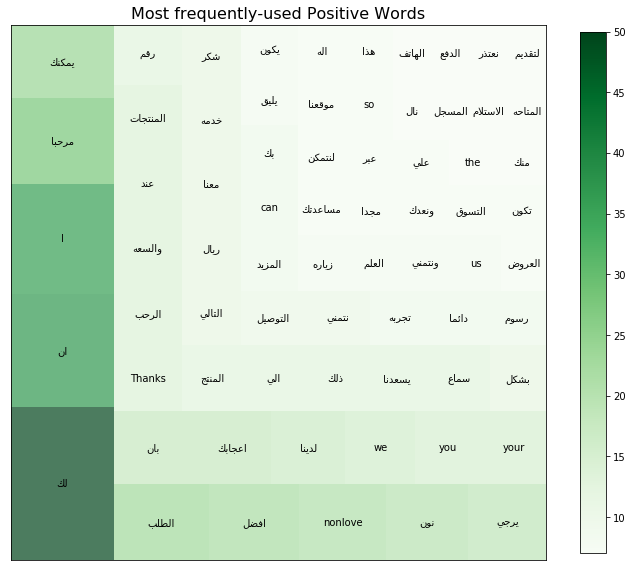

In [20]:
# treemap parameters
x = 0.
y = 0.
width = 100.
height = 100.
cmap = matplotlib.cm.Greens
mini, maxi = dataFramePos3.PosFrequency.min(), dataFramePos3.PosFrequency.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in dataFramePos3.PosFrequency]
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(dataFramePos3.PosFrequency, color=colors, label=dataFramePos3.PosWords, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Most frequently-used Positive Words", fontsize=16)
# color bar
# create dummy invisible image with a color map
img = plt.imshow([dataFramePos3.PosFrequency], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

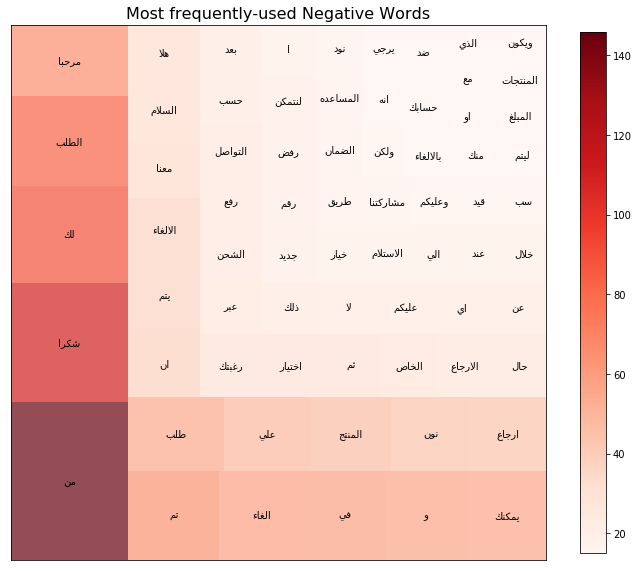

In [21]:
# treemap parameters
x = 0.
y = 0.
width = 100.
height = 100.
cmap = matplotlib.cm.Reds
mini, maxi = dataFrameNeg2.NegFrequency.min(), dataFrameNeg2.NegFrequency.max()
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in dataFrameNeg2.NegFrequency]
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, aspect="equal")
ax = squarify.plot(dataFrameNeg2.NegFrequency, color=colors, label=dataFrameNeg2.NegWords, ax=ax, alpha=.7)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title("Most frequently-used Negative Words", fontsize=16)

# color bar
# create dummy invisible image with a color map
img = plt.imshow([dataFrameNeg2.NegFrequency], cmap=cmap)
img.set_visible(False)
fig.colorbar(img, orientation="vertical", shrink=.96)

In [22]:
allPositiveWords = [word for tokens in dataFramePos["tokens"] for word in tokens]
posWordsList = dict(Counter(allPositiveWords).most_common(50))
pos_data_items = posWordsList.items() 
pos_data_list = list(pos_data_items)  
dataFramePos2 = pd.DataFrame(pos_data_list,columns = ['PosWords','PosFrequency'])